In [2]:
import jupyter_black

import sys, os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torchvision.io import read_image
from torchvision.io.image import ImageReadMode
from torch.utils.data import DataLoader

if not "/usr/src" in sys.path:
    sys.path.append("/usr/src/")

jupyter_black.load()

In [2]:
# Custom modules
from dataset import create_substrate_dataset, get_part_substrates_from_all
from unet import UNet
from diffusion import Diffusion

In [1]:
# Dirs
substrate_dir = "/usr/src/data/substrates/"
part_substrate_dir = "/usr/src/data/`part_substrates/"
cell_dir = "/usr/src/data/separated_cells/"

samples_cell_dir = "/usr/src/samples_cell/"
samples_substrate_dir = "/usr/src/samples_substrate/"

In [13]:
substrate = cv.imread(samples_substrate_dir + "sample_0.png")
substrate = cv.cvtColor(substrate, cv.COLOR_BGR2BGRA)
cell = cv.imread(samples_cell_dir + "sample_10.png")
cell = cv.cvtColor(cell, cv.COLOR_BGR2BGRA)

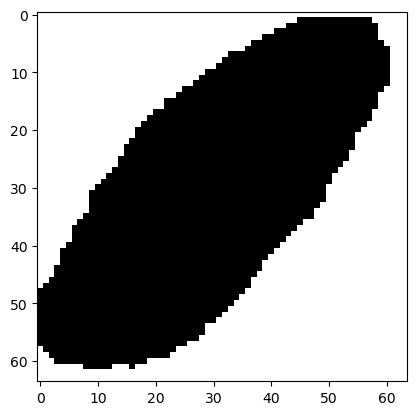

In [82]:
ret, mask = cv.threshold(cell, 20, 255, cv.THRESH_BINARY_INV)
plt.imshow(mask)

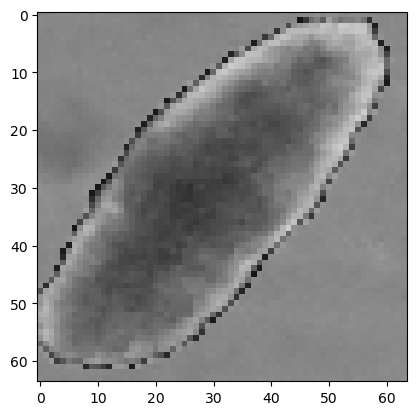

In [83]:
some = cv.bitwise_and(substrate[10 : 10 + 64, 10 : 10 + 64], mask, substrate)
some = some + cell
plt.imshow(some)